# Goal and Objective

The objective of this analysis is to explore the factors influencing student exam performance using a dataset containing various student attributes. The analysis aims to:
- Identify key predictors of academic success.
- Understand the relationships between different factors and exam scores.
- Provide actionable insights and recommendations for educators and policymakers to enhance student performance.

###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import math

In [2]:
df = pd.read_csv('/Users/sanjayakunwar/Desktop/StudentPerformanceFactors 2.csv', header=0)

In [3]:
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

###

### Teacher_Quality

In [6]:
df['Teacher_Quality'].value_counts()

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64

In [7]:
df['Teacher_Quality']=df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode().iloc[0])

###

### Parental_Education_Level

In [8]:
df['Parental_Education_Level'].value_counts()

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64

In [9]:
df['Parental_Education_Level']=df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])

####

### Distance_from_Home

In [10]:
df['Distance_from_Home'].value_counts()

Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64

In [11]:
df['Distance_from_Home']=df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode().iloc[0])

###

### Distribution of Features 

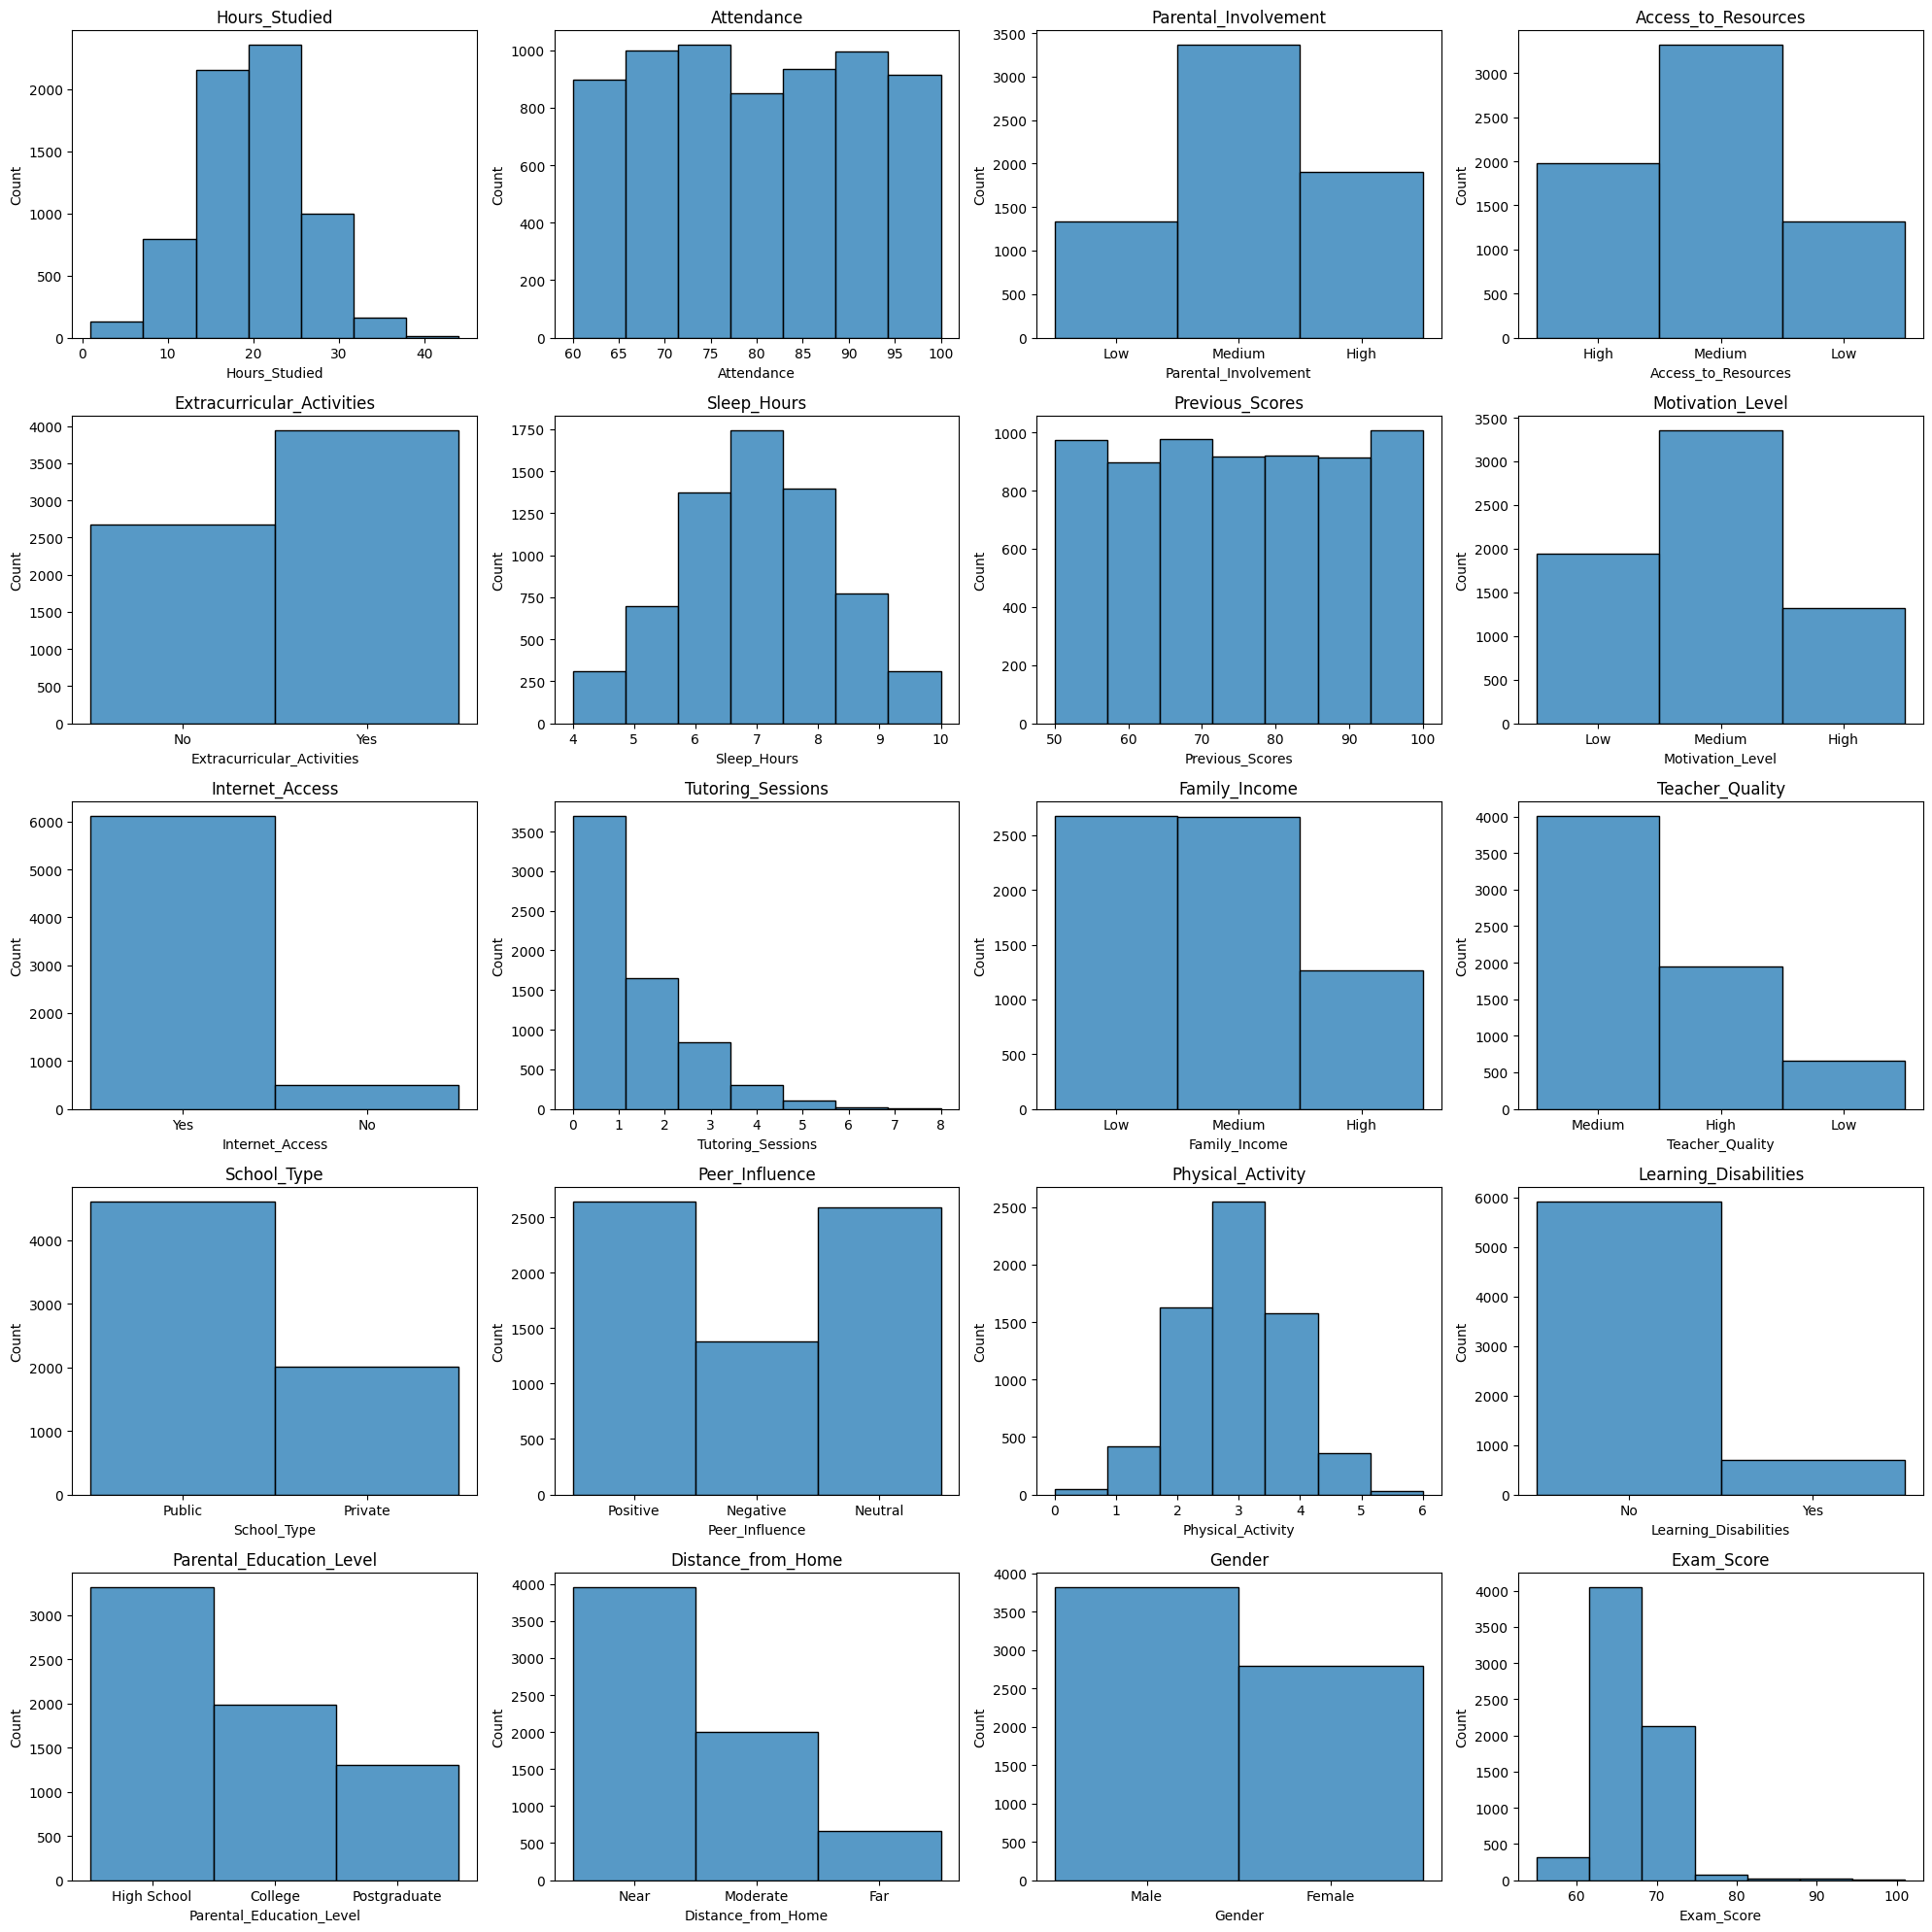

In [12]:
fig, axes = plt.subplots(5, 4, figsize=(20,20))

axes = axes.flatten()  



for index, col in enumerate(df.columns):
    sns.histplot(df[col], bins=7, ax=axes[index])  
    axes[index].set_title(col)  



plt.tight_layout()
plt.show()

###

###

###

## Now we show violin plots for categorical columns and scatter for numerical columns.

### Violin plots for categorical columns

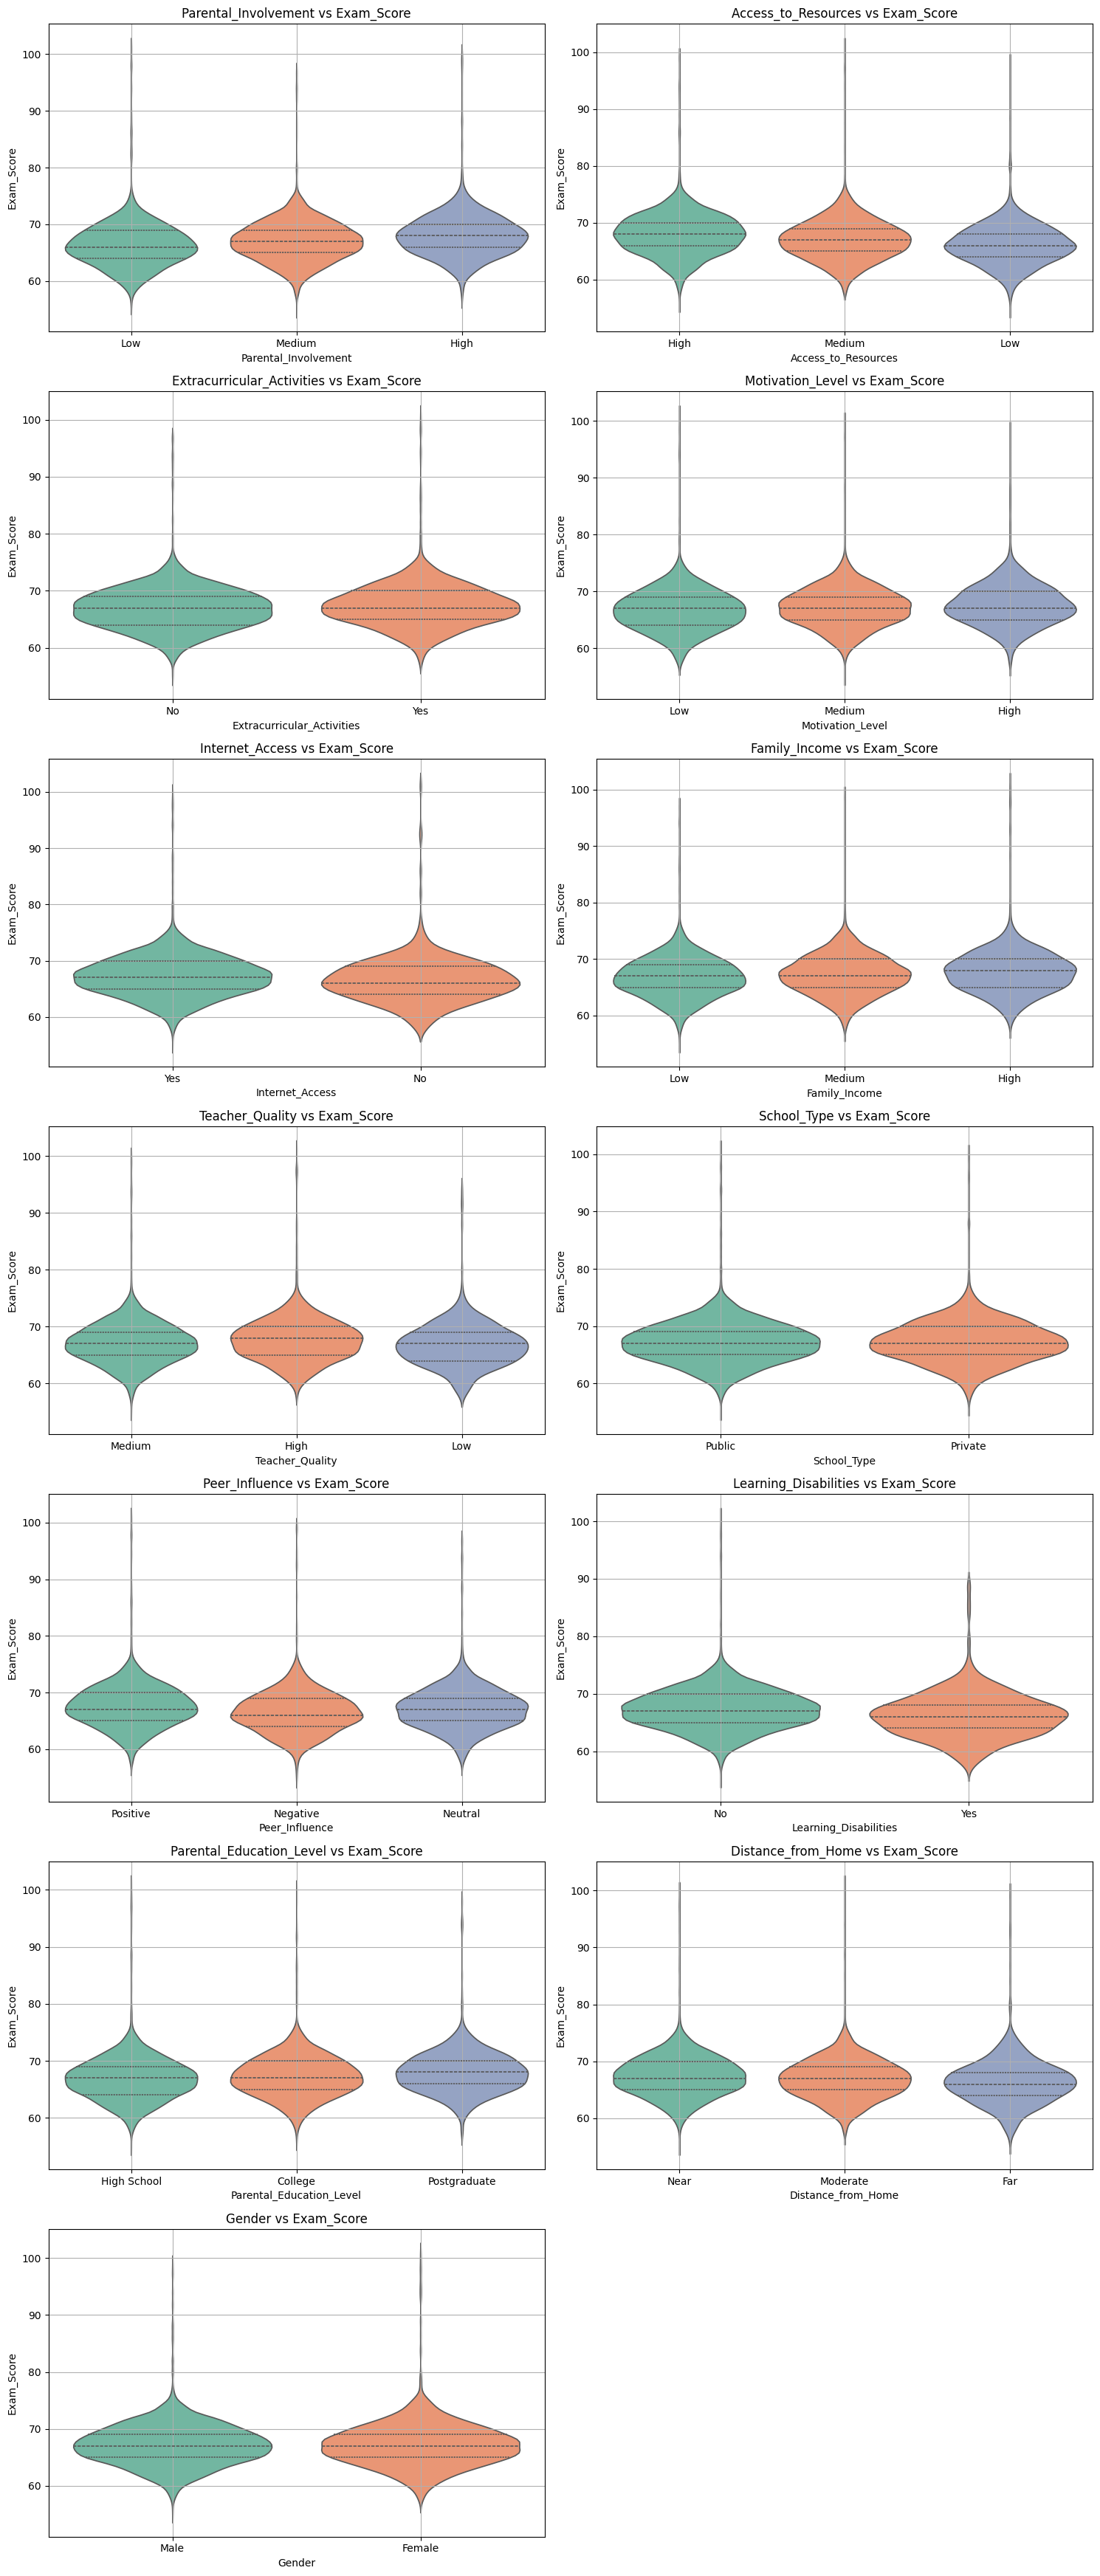

In [13]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
n_rows = math.ceil(len(categorical_features) / 2)

# Create subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Violin plot with color palette and no legend
for i, col in enumerate(categorical_features):
    sns.violinplot(x=df[col], y=df['Exam_Score'], hue=df[col], ax=axes[i], inner="quartile", palette="Set2", legend=False)
    #sns.stripplot(x=df[col], y=df['Exam_Score'], data=df, ax=axes[i], color='black', size=3, alpha=0.5, jitter=True)
    axes[i].set_title(f'{col} vs Exam_Score')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Exam_Score')
    axes[i].grid(True)

# Remove any empty subplots
for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


###

### Scatter plot for Numerical columns

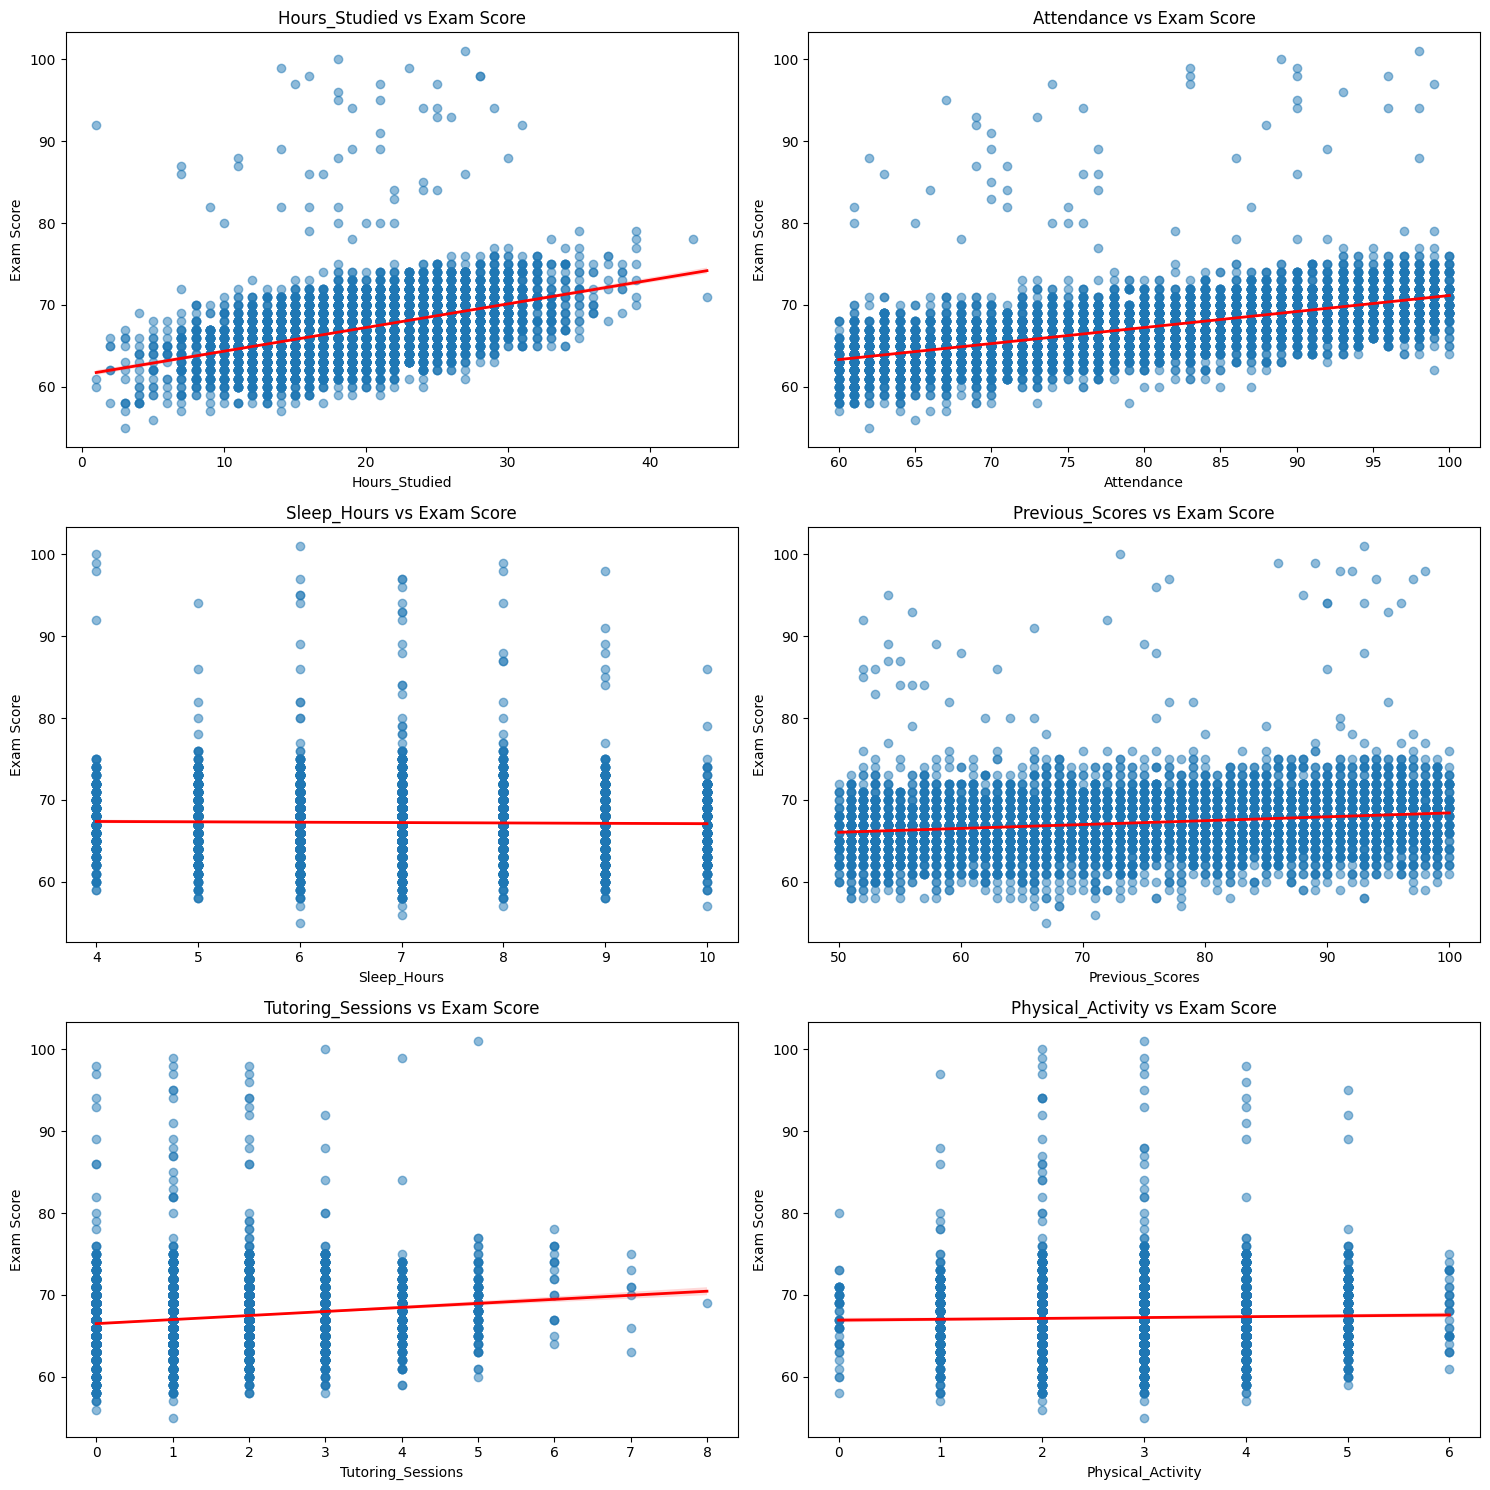

In [14]:
# create scatter plot for numerical values columns and boxplot for categorical values .



# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('Exam_Score')  # Remove target variable if it's in the list

n_rows = math.ceil(len(numerical_features)/ 2)

fig, axes = plt.subplots(n_rows, 2, figsize=(15, 15))

axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.regplot(x=df[col], y=df['Exam_Score'], ax=axes[i], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'linewidth': 2})
    axes[i].set_title(f'{col} vs Exam Score')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Exam Score')

plt.tight_layout()
plt.show()

###

###

###  Change all categorical columns to numerical values

In [15]:
encoded_df = pd.DataFrame() # create a empty Dataframe to put a encoded values .



# Manual Encoding of Binary and Ordinal Variables

encoded_df['Extracurricular_Activities_encoded'] = df['Extracurricular_Activities'].map({'Yes': 1, 'No':0})
encoded_df['Internet_Access_encoded'] = df['Internet_Access'].map({'Yes': 1, 'No':0})
encoded_df['School_Type_encoded'] = df['School_Type'].map({'Public': 1, 'Private':0})
encoded_df['Peer_Influence_encoded'] = df['Peer_Influence'].map({'Negative': -1,'Neutral': 0, 'Positive':1})
encoded_df['Learning_Disabilities_encoded'] = df['Learning_Disabilities'].map({'Yes': 1, 'No':0})
encoded_df['Gender_encoded'] = df['Gender'].map({'Male': 1, 'Female':0})



# Apply pandas cat.codes encoding method to maintain inherent order.

for col in ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality']:
    df[col] = pd.Categorical(df[col], categories=['Low', 'Medium', 'High'], ordered=True)
    encoded_df[f'{col}_encoded'] = df[col].cat.codes

df['Parental_Education_Level'] = pd.Categorical(df['Parental_Education_Level'], 
                                                categories=['High School', 'College', 'Postgraduate'], 
                                                ordered=True)
encoded_df['Parental_Education_Level_encoded'] = df['Parental_Education_Level'].cat.codes

df['Distance_from_Home'] = pd.Categorical(df['Distance_from_Home'], 
                                          categories=['Near', 'Moderate', 'Far'], 
                                          ordered=True)
encoded_df['Distance_from_Home_encoded'] = df['Distance_from_Home'].cat.codes






#create a final_df with concat encoded_df and numerical column from original df 

final_df = pd.concat([df.select_dtypes(include=['int']), encoded_df], axis=1)

final_df.sample(3)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Extracurricular_Activities_encoded,Internet_Access_encoded,School_Type_encoded,Peer_Influence_encoded,Learning_Disabilities_encoded,Gender_encoded,Parental_Involvement_encoded,Access_to_Resources_encoded,Motivation_Level_encoded,Family_Income_encoded,Teacher_Quality_encoded,Parental_Education_Level_encoded,Distance_from_Home_encoded
1307,20,90,6,69,2,3,72,1,1,1,0,0,0,2,2,1,2,2,0,0
4906,17,99,8,62,3,3,70,1,1,0,0,0,1,1,1,1,1,1,0,0
4876,12,61,7,81,2,3,62,1,1,1,0,0,1,1,1,1,2,1,1,2


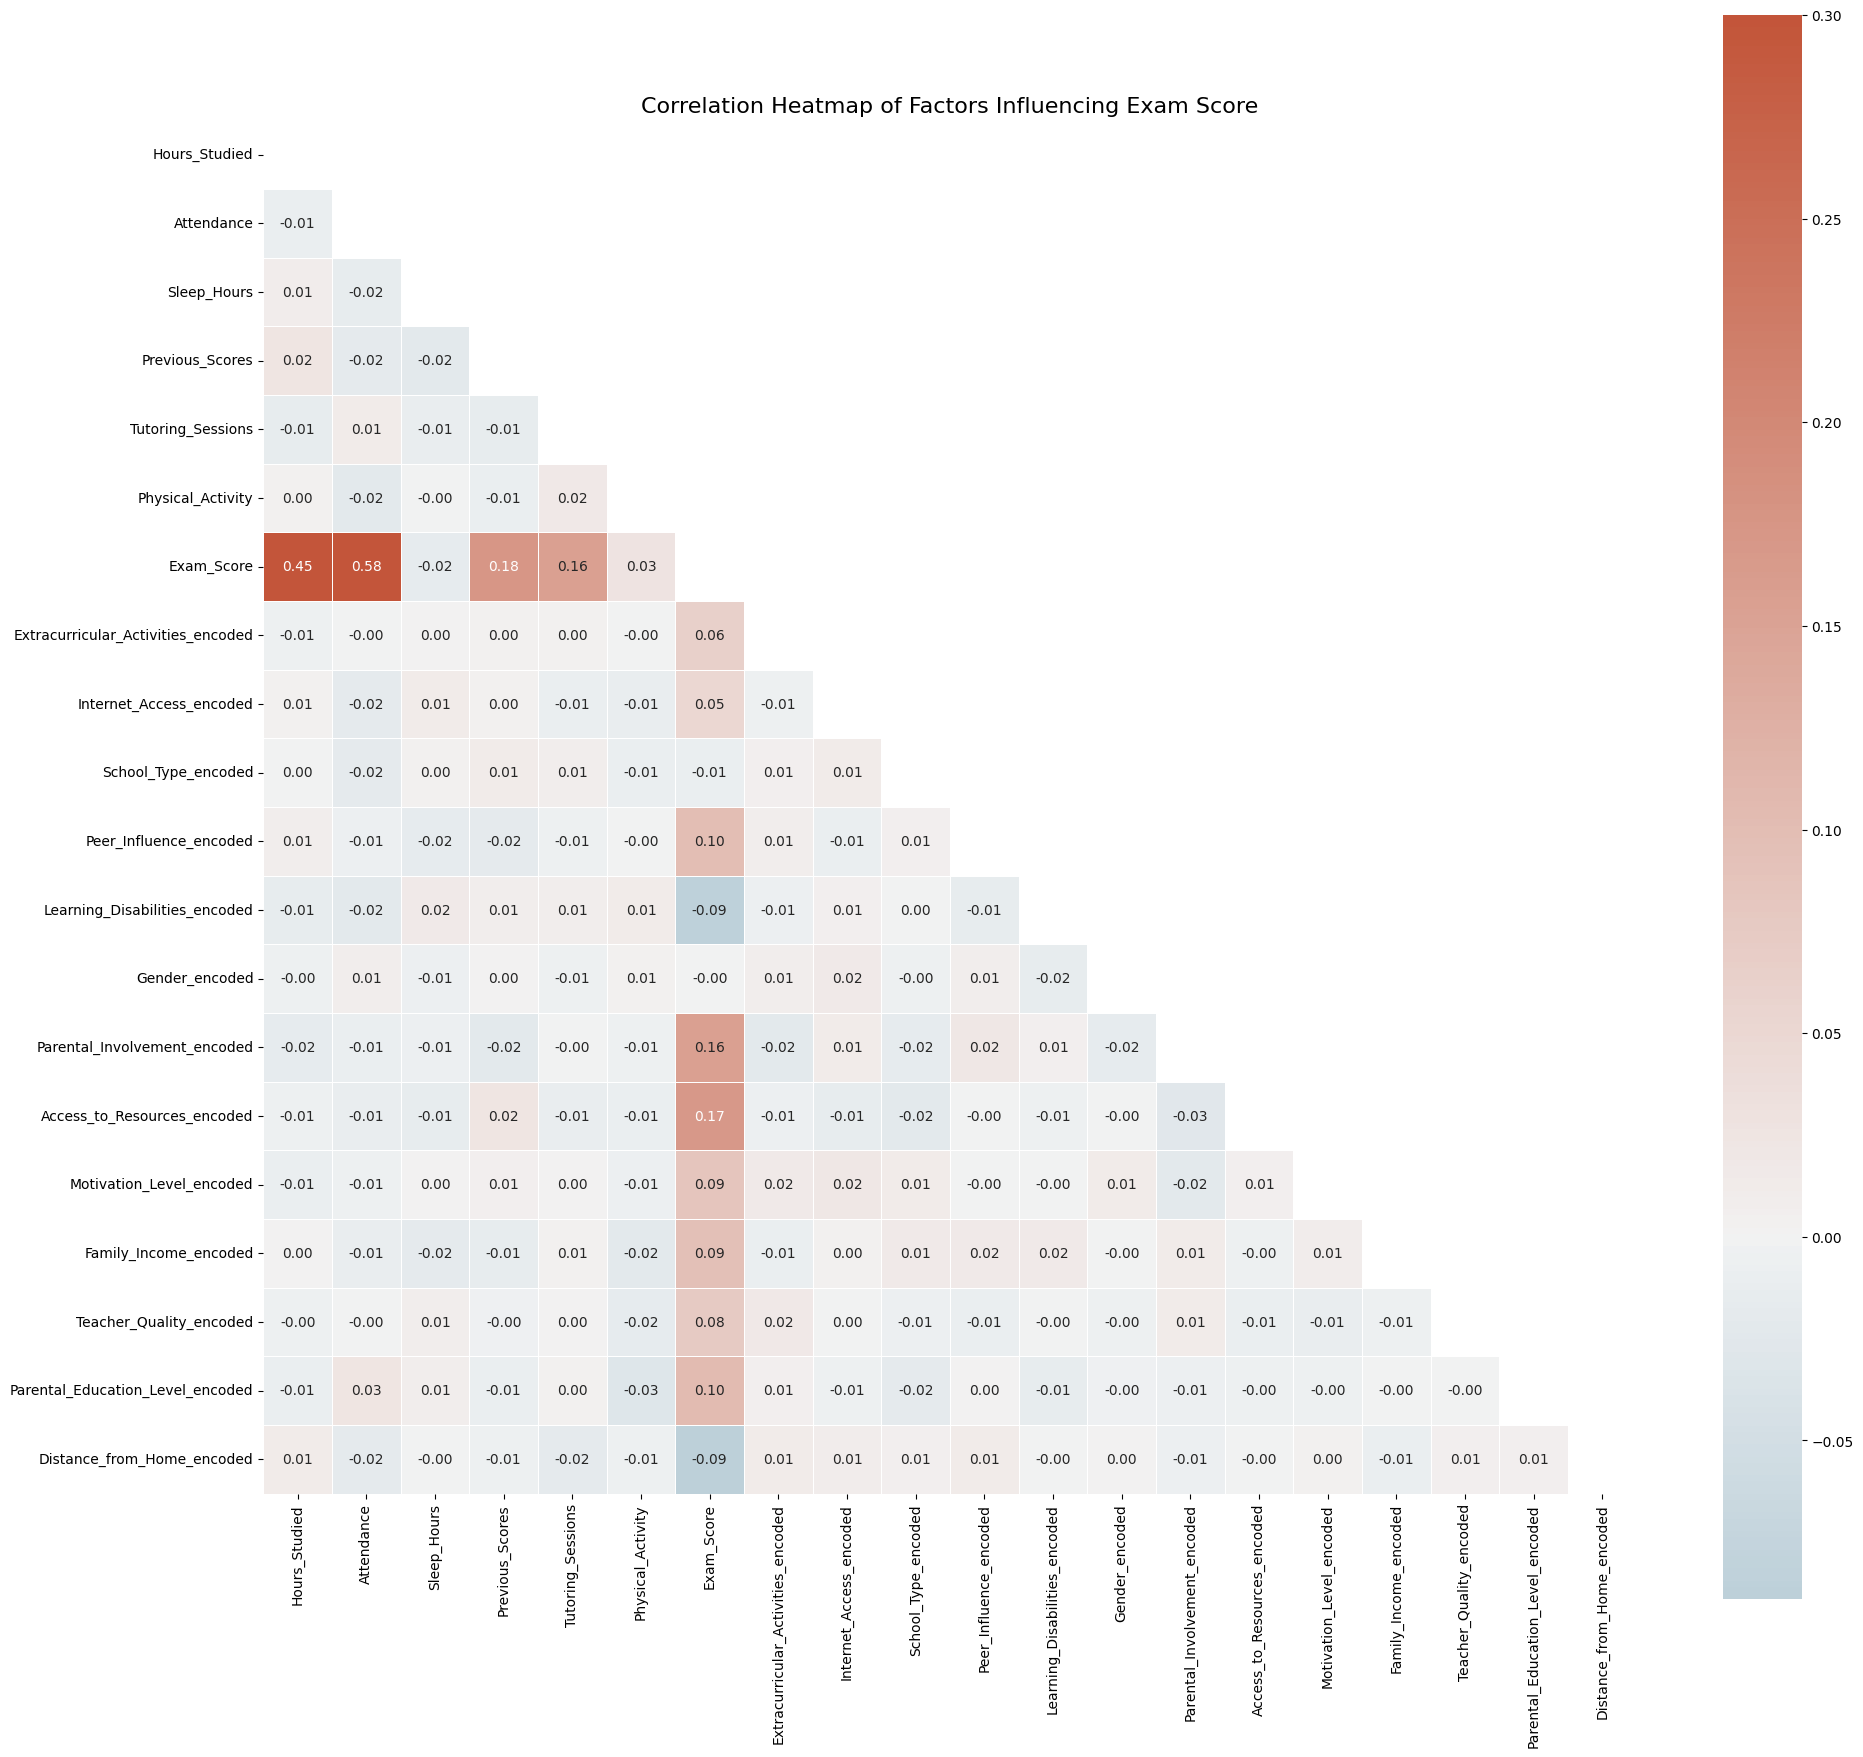

In [16]:

corr_matrix = final_df.corr()

plt.figure(figsize=(20, 18))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Create a mask for the upper triangle

cmap = sns.diverging_palette(230, 20, as_cmap=True) # Generate a custom diverging colormap

# Draw the heatmap
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5,  annot=True, fmt='.2f')

plt.title('Correlation Heatmap of Factors Influencing Exam Score', fontsize=16)
plt.tight_layout()
plt.show()

###

###

                        MSE        R2  CV_R2_mean  CV_R2_std
Linear_Regression  3.237946  0.770928    0.726541   0.068515
Random_Forest      4.747917  0.664104    0.641568   0.059340
XGBoost            4.955902  0.649390    0.644009   0.058158


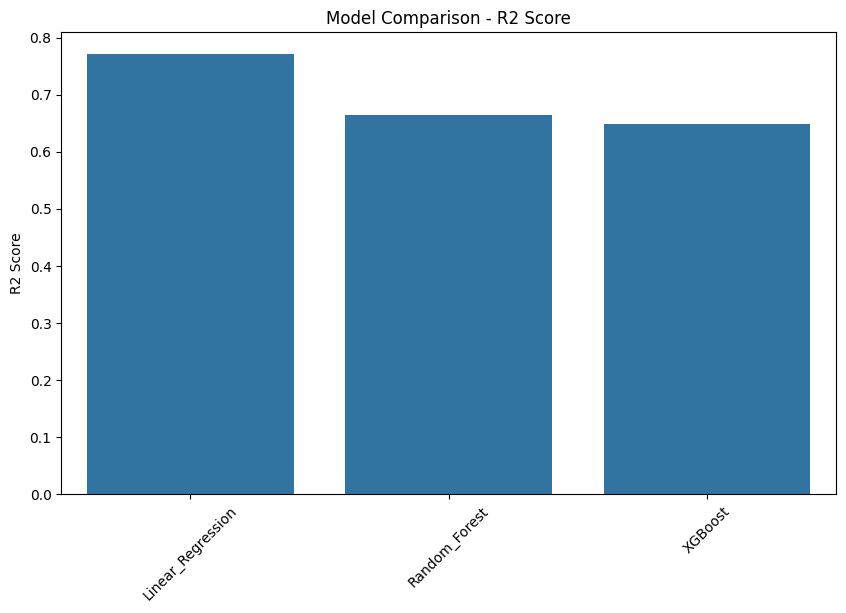

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Assuming 'final_df' is your preprocessed DataFrame

# 1. Predictive Modeling
X = final_df.drop('Exam_Score', axis=1)
y = final_df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear_Regression': LinearRegression(),
    'Random_Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    results[name] = {'MSE': mse, 'R2': r2, 'CV_R2_mean': cv_scores.mean(), 'CV_R2_std': cv_scores.std()}


results_df = pd.DataFrame.from_dict(results,orient='index')
print(results_df)

# Visualize model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=[r['R2'] for r in results.values()])
plt.title('Model Comparison - R2 Score')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()

Based on the results, Linear Regression outperforms the other models with the lowest MSE (3.24) and the highest R² score (0.77), indicating better predictive accuracy and explained variance.
It also outperforms the more complex Random Forest , with a moderately higher MSE (4.74) and R² score (0.66), and XGBoost models for this particular dataset, suggesting that the relationships between the predictors and Exam_Score are predominantly linear.

###

### Get important Features in LinearRegression and Randon Forest Model.

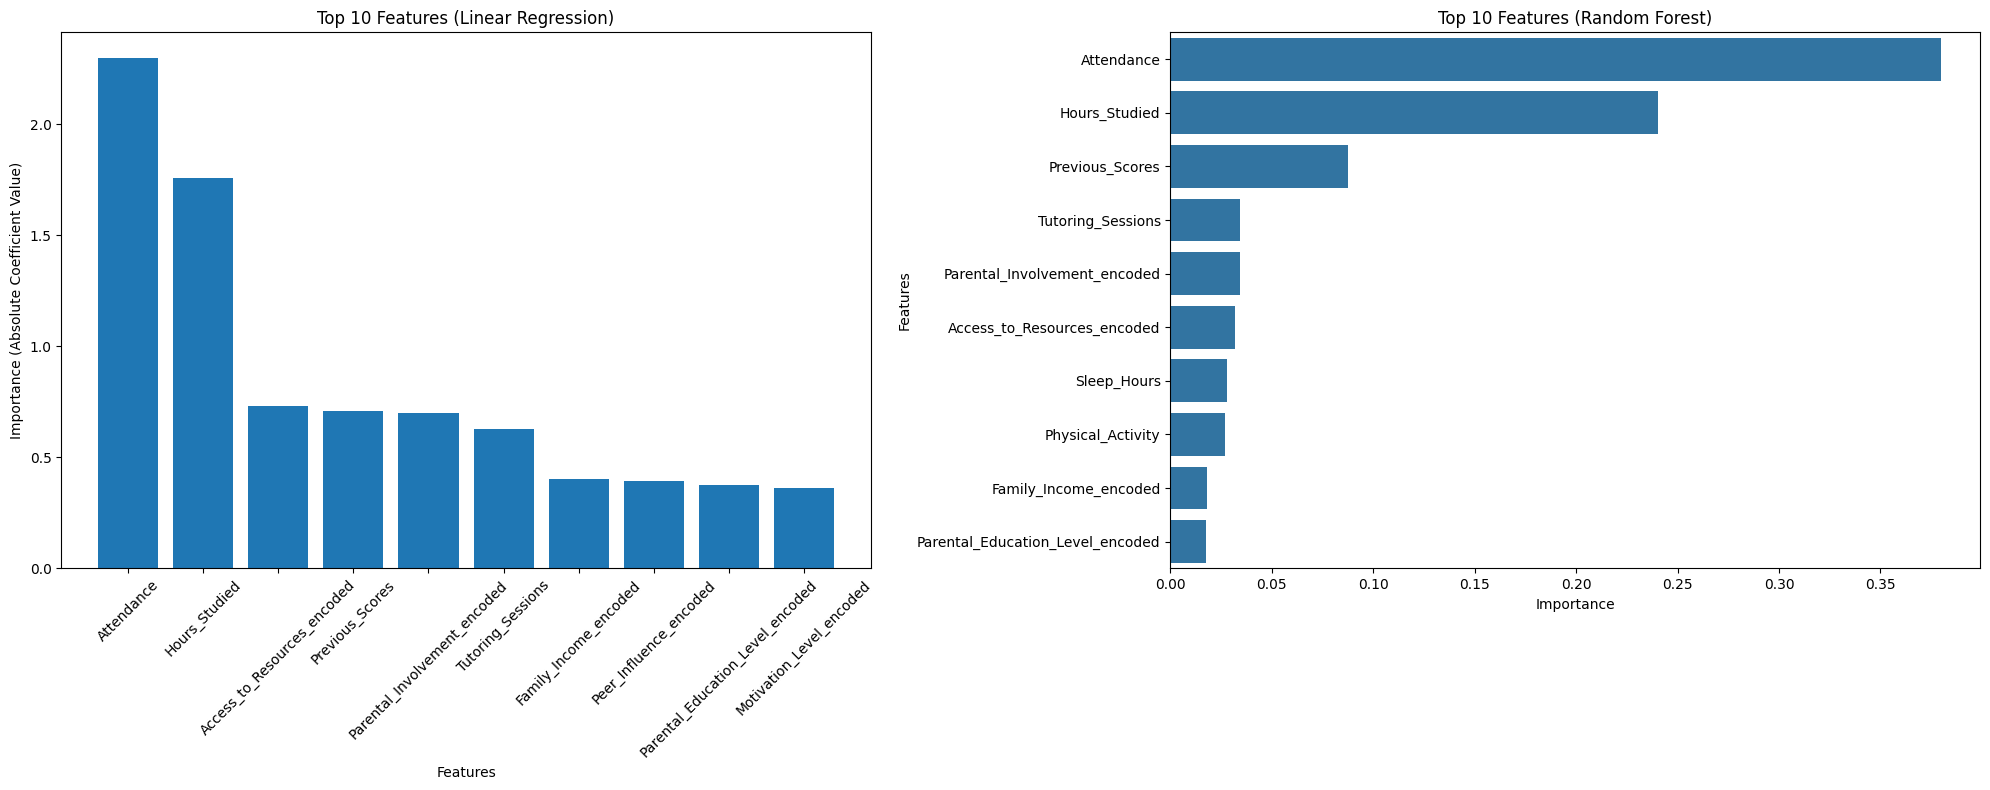

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

X = final_df.drop('Exam_Score', axis=1)
y = final_df['Exam_Score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Get feature importances for Linear Regression
lr_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(lr_model.coef_)
}).sort_values('Importance', ascending=False)




rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances for Random Forest
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)




# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot Linear Regression feature importance
ax1.bar(lr_importance['Feature'][:10], lr_importance['Importance'][:10])
ax1.set_title('Top 10 Features (Linear Regression)')
ax1.set_xlabel('Features')
ax1.set_ylabel('Importance (Absolute Coefficient Value)')
ax1.tick_params(axis='x', rotation=45)

# Plot XGBoost feature importance
sns.barplot(x='Importance', y='Feature', data=rf_importance.head(10), ax=ax2)
ax2.set_title('Top 10 Features (Random Forest)')
ax2.set_xlabel('Importance')
ax2.set_ylabel('Features')

plt.tight_layout()
plt.show()


# Common features from both models are :                 
#### Attendance 
#### Hours_Studied                              
#### Tutoring_Sessions
#### Access_to_Resources
#### Previous_Scores
#### Parental_Involvement
#### Family_Income

###

## Top Features from each model are:
#### Attendance 
#### Hours_Studied
#### Previous_Score
#### Parential_Involvement
#### Access_to_Resources
#### Previous_Scores

###

### 3D Visualization of Exam Score Relationships with Numerical Features

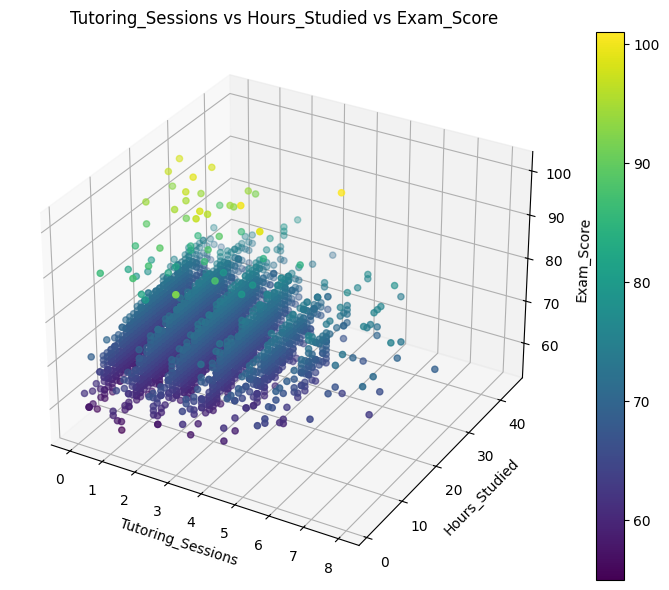

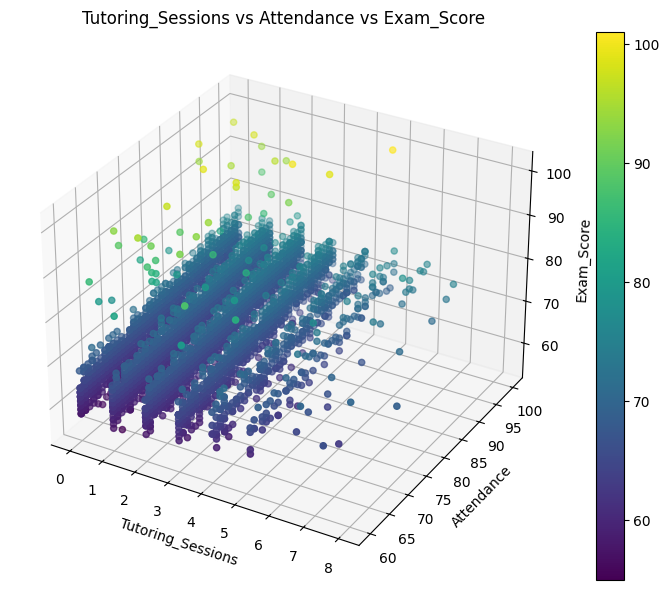

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import itertools

# Assuming final_df is your DataFrame
# Select only the truly numerical features
numerical_features = ['Tutoring_Sessions', 'Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
                       'Physical_Activity']

# Create all possible pairs of numerical features
feature_pairs = list(itertools.combinations(numerical_features, 2))

#print(len(feature_pairs))

# Function to create a 3D scatter plot
def plot_3d_scatter(df, x_col, y_col, z_col='Exam_Score'):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(df[x_col], df[y_col], df[z_col], c=df[z_col], cmap='viridis')

    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_zlabel(z_col)
    ax.set_title(f'{x_col} vs {y_col} vs {z_col}')
        
    plt.colorbar(scatter)
    plt.tight_layout()
    plt.show()

# Create 3D plots for each pair of numerical features
for x_col, y_col in feature_pairs:
    plot_3d_scatter(final_df, x_col, y_col)

###

###

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Scale features
scaler = StandardScaler()
X = final_df.drop(columns=['Exam_Score'])

feature_scaled = scaler.fit_transform(X)

inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, init='k-means++', n_init=12)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow clusters')
plt.xlabel('Number oc Clusters (K)')
plt.ylabel('inertia')
plt.show()

In [ ]:
# k=3 based on elbow plot 
kmeans = KMeans(n_clusters=4, random_state=42)
final_df['clusters'] = kmeans.fit_predict(feature_scaled)

In [ ]:
# Analyze cluster characteristics
cluster_summary = final_df.groupby('clusters').mean()
print(cluster_summary)

In [ ]:
# Function to display encoding for a column
def show_encoding(column_name):
    categories = df[column_name].cat.categories
    codes = df[column_name].cat.codes.unique()
    print(f"\n{column_name}:")
    for category, code in zip(categories, codes):
        print(f"  {category}: {code}")

# Display encoding for each column
for col in ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    show_encoding(col)

## Key Conclusions:
- Cluster 0 shows the best overall academic performance, with the highest exam scores, good previous scores, high attendance, and the highest parental education level. This suggests a strong link between parental education and student performance.
  
- Cluster 1 has the lowest attendance and exam scores, but the highest parental involvement, family income, and physical activity. This could indicate that these factors alone don't guarantee academic success.
  
- Cluster 2 has the highest previous scores and teacher quality, but average exam scores. This cluster also has the lowest peer influence, which might suggest that peer effects are important for translating past performance into current success.
  
- Cluster 3 stands out with the highest study hours and distance from home. Despite more study time, their exam scores are average, suggesting that quality of study time might be more important than quantity.
  
These insights can help in developing targeted interventions for different student groups, focusing on the most influential factors for each cluster to improve overall academic performance.


###

### Top 5 features for each cluster.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def get_feature_importance(cluster_df):
    X = cluster_df.drop(['Exam_Score', 'clusters'], axis=1)
    y = cluster_df['Exam_Score']
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    return pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_}).sort_values('importance', ascending=False)

for cluster in range(4):
    cluster_df = final_df[final_df['clusters'] == cluster]
    importance = get_feature_importance(cluster_df)
    print(f"\nTop 5 important features for Cluster {cluster}:")
    print(importance.head())

###

#### Attendance, Hours_Studied, and Previous_Scores are the top 3 features for all clusters, though their exact order and importance values vary slightly. This suggests these are universally important factors for exam performance.

### Cluster-Specific Features:
The 4th and 5th most important features differ between clusters, which could indicate what makes each cluster unique:
- **Cluster 0 & 2:** `Parental_Involvement` and `Tutoring_Sessions`
- **Cluster 1:** `Access_to_Resources` and `Physical_Activity`
- **Cluster 3:** Similar to Clusters 0 & 2
